In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import files
upload = files.upload()

Saving Big Mart Train.csv to Big Mart Train.csv


In [131]:
df = pd.read_csv('Big Mart Train.csv')

In [132]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [133]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [134]:
mean_item_weight = df['Item_Weight'].mean()
print(mean_item_weight)

12.857645184136183


In [135]:
df['Item_Weight'] = df['Item_Weight'].fillna(mean_item_weight)

In [136]:
df.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [137]:
mode_outlet_size = df.pivot_table(values = 'Outlet_Size', columns= 'Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
mode_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [138]:
bool_missing = df['Outlet_Size'].isna()
bool_missing

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [139]:
df.loc[bool_missing, 'Outlet_Size'] = df.loc[bool_missing, 'Outlet_Type'].apply(lambda x: mode_outlet_size[x])
print(df['Outlet_Size'])

0       Medium
1       Medium
2       Medium
3        Small
4         High
         ...  
8518      High
8519     Small
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object


In [140]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Data Exploration & Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


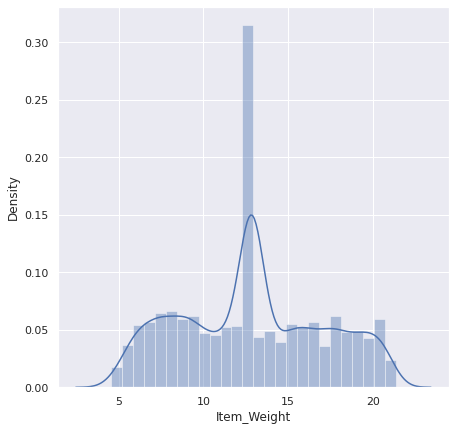

In [141]:
import seaborn as sns
plt.figure(figsize=(7,7))
sns.set()
sns.distplot(df['Item_Weight'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


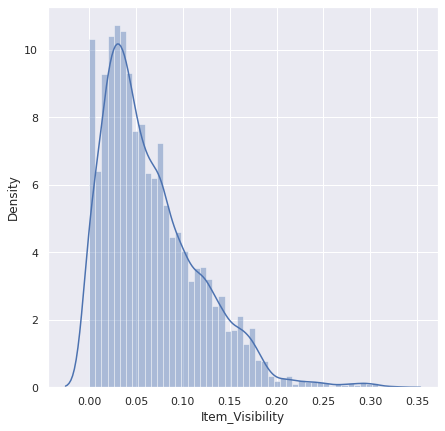

In [142]:
plt.figure(figsize=(7,7))
sns.distplot(df['Item_Visibility'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


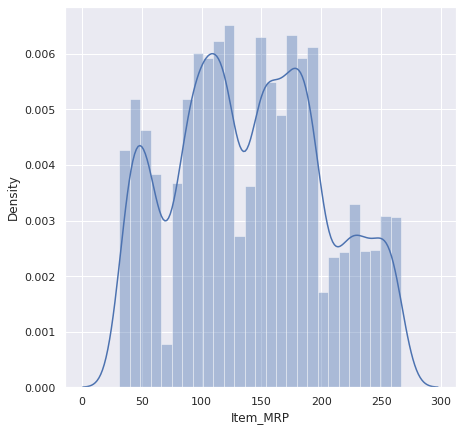

In [143]:
plt.figure(figsize=(7,7))
sns.distplot(df['Item_MRP'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


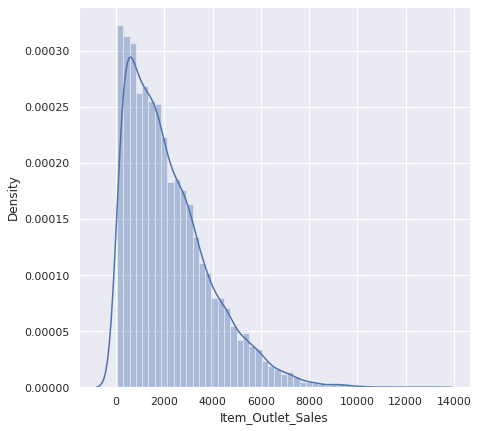

In [144]:
plt.figure(figsize=(7,7))
sns.distplot(df['Item_Outlet_Sales'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


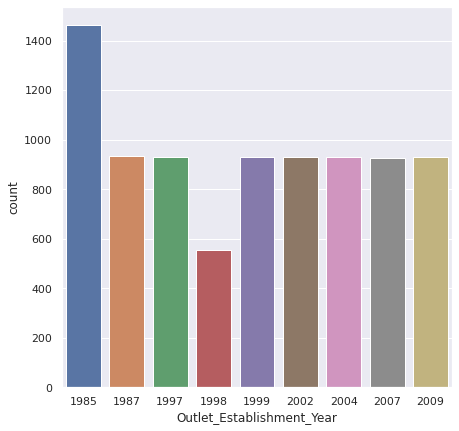

In [145]:
plt.figure(figsize=(7,7))
sns.countplot(df['Outlet_Establishment_Year'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


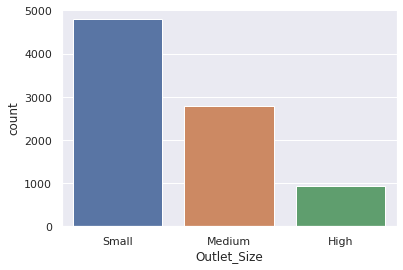

In [146]:
sns.countplot(df['Outlet_Size'].sort_values(ascending = False))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


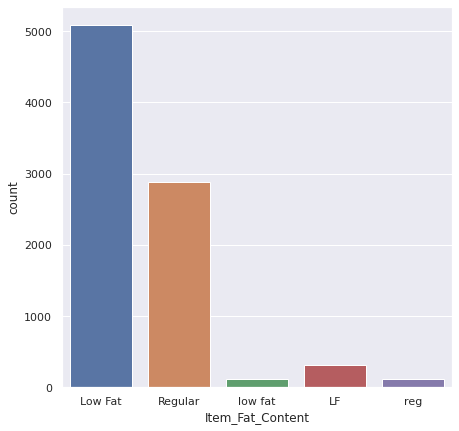

In [147]:
plt.figure(figsize=(7,7))
sns.countplot(df['Item_Fat_Content'])

In [148]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


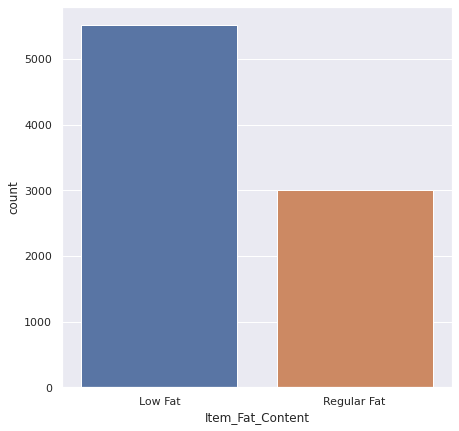

In [149]:

df.replace({'Item_Fat_Content': {'Low Fat': 'Low Fat', 'low fat': 'Low Fat', 'LF': 'Low Fat', 'Regular': 'Regular Fat', 'reg': 'Regular Fat' }}, inplace = True)
df['Item_Fat_Content'].unique()

plt.figure(figsize=(7,7))
sns.countplot(df['Item_Fat_Content'])

In [150]:
df['Item_Fat_Content'].value_counts()

Low Fat        5517
Regular Fat    3006
Name: Item_Fat_Content, dtype: int64

Transforming non categorical to categorical data

Label Encoding

In [151]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df2 = df

In [152]:
df2['Item_Identifier'] = encoder.fit_transform(df2['Item_Identifier'])

df2['Item_Fat_Content'] = encoder.fit_transform(df2['Item_Fat_Content'])

df2['Item_Type'] = encoder.fit_transform(df2['Item_Type'])

df2['Outlet_Identifier'] = encoder.fit_transform(df2['Outlet_Identifier'])

df2['Outlet_Size'] = encoder.fit_transform(df2['Outlet_Size'])

df2['Outlet_Location_Type'] = encoder.fit_transform(df2['Outlet_Location_Type'])

df2['Outlet_Type'] = encoder.fit_transform(df2['Outlet_Type'])

df2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [153]:
df2['Outlet_Establishment_Year'] = 2021 - df2['Outlet_Establishment_Year']

In [154]:
df2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,22,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,12,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,22,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,23,2,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,34,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,34,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,19,2,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,17,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,12,1,2,2,1845.5976


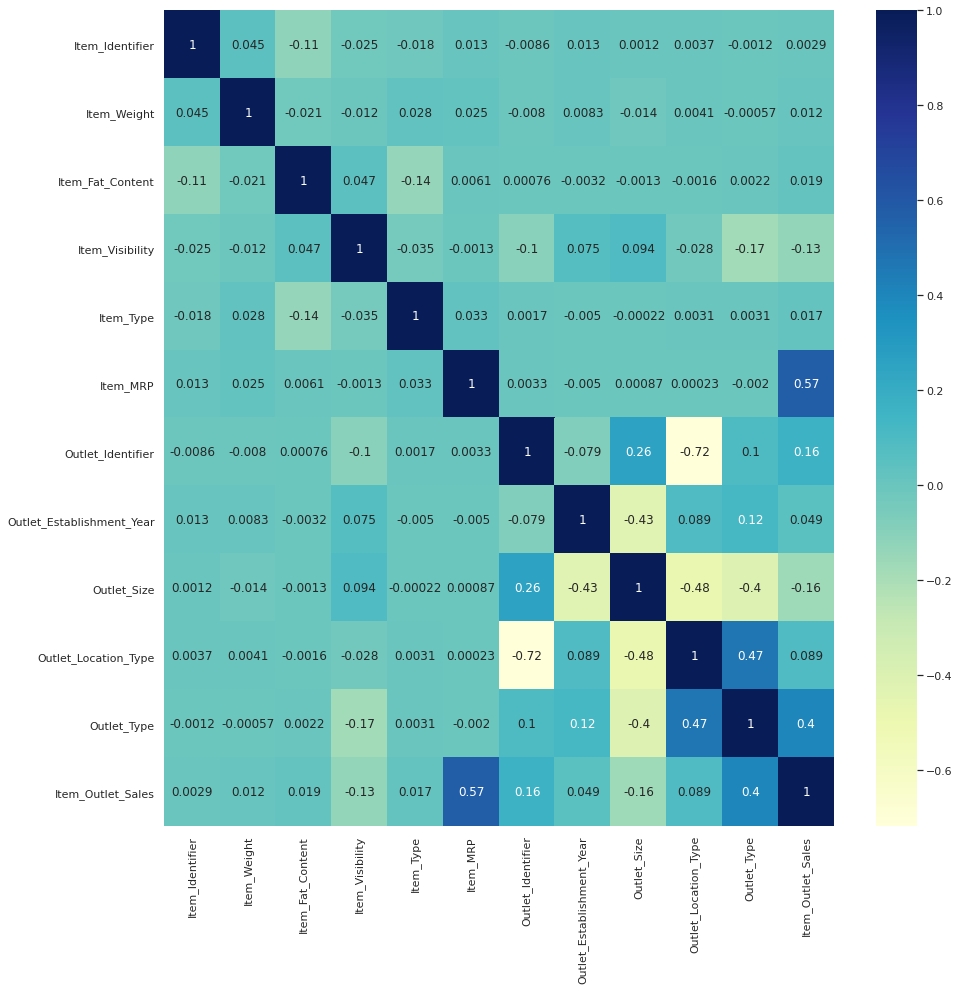

In [163]:
corr = df2.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot = True, cmap="YlGnBu")

In [167]:
X = df2.drop(columns = 'Item_Outlet_Sales')
y = df2['Item_Outlet_Sales']


0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

Train Test & Splitting


In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 70)


(1705, 11)

Machine Learning Model

In [176]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)

[19:14:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [181]:
sales_prediction = model.predict(X_train)
#R2 Value

from sklearn.metrics import r2_score

r2_train = r2_score(y_train, sales_prediction)
print('R2 Value of trained model on train data:', r2_train)

#R2 Value for test data
test_sales_prediction = model.predict(X_test)
r2_test = r2_score(y_test, test_sales_prediction)
print('R2 Value of trained model on test data:', r2_test)

R2 Value of trained model on train data: 0.6353780146856545
R2 Value of trained model on test data: 0.6069929340918099
